In [1]:
%pylab inline
import pandas as pd
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


* 根据一个或多个键(可以使函数、数组或DataFrame列名)拆分pandas对象
* 计算分组摘要统计,如计数、平均值、标准差或用户自定义函数
* 对DataFrame的列应用各种各样的函数
* 应用组内转换或其他运算,如规格化、线性回归、排名或选取子集等
* 计算透视表或交叉表
* 执行分位数分析以及其他分组分析

# GourpBy技术
1. 拆分
2. 应用
3. 合并

### 分组键形式
* 列表或数组,其长度与待分组的轴一样
* 表示DataFrame某个列名的值
* 字典或Series,给出待分组轴上的值与分组名之间的对应关系
* 函数,用于处理轴索引或索引中的各个标签

In [2]:
df = DataFrame({'key1':list('aabba'),
                'key2':['one','two','one','two','one'],
                'data1':np.random.randn(5),
                'data2':np.random.randn(5)})
df

,data1,data2,key1,key2
0,-3.137164,-0.694334,a,one
1,-0.081033,-2.293427,a,two
2,-0.548000,0.091741,b,one
3,-0.200163,-1.829656,b,two
4,0.928575,0.985471,a,one


In [4]:
# 按key1进行分组,并计算data1列的平均值
# 访问data1,并根据key1调用groupby
grouped = df['data1'].groupby(df['key1'])

# grouped是一个groupby对象,没有进行任何计算,只含有一些有关分组键df['key1']的中间数据
grouped

In [5]:
# 计算平均值
grouped.mean()

key1
a   -0.344377
b   -0.161810
Name: data1, dtype: float64

* 数据(Series)根据分组键进行了聚合,产生了一个新的Series,索引为key1列中的唯一值
* 所以结果中的索引名称为key1(原始DataFrame的列df['key1']的名称)

In [5]:
# 一次传入多个数组
means = df['data1'].groupby([df['key1'],df['key2']]).mean()
means.unstack()

key2,one,two
key1,,
a,-1.104295,-0.081033
b,-0.548000,-0.200163


In [8]:
# 长度适当的数组作为分组键
years = np.array([2005,2006,2007,2008,2009])
df['data1'].groupby(years).mean()

2005    1.005473
2006   -0.817940
2007   -1.468768
2008    1.145148
2009   -1.220666
Name: data1, dtype: float64

In [3]:
# 将列名作为分组键,默认聚合数值列,排除不是数据的数据(麻烦列)
df.groupby('key1').mean()

,data1,data2
key1,,
a,-0.763207,-0.667430
b,-0.374081,-0.868957


In [6]:
# size方法,返回含有分组大小的Series
df.groupby(['key1','key2']).size()

key1  key2
a     one     2
      two     1
b     one     1
      two     1
dtype: int64

## 对分组进行迭代
* groupby对象支持迭代,产生一组二元元组

In [8]:
for name, group in df.groupby('key1'):
    print name
    print group

a
      data1     data2 key1 key2
0 -3.137164 -0.694334    a  one
1 -0.081033 -2.293427    a  two
4  0.928575  0.985471    a  one
b
      data1     data2 key1 key2
2 -0.548000  0.091741    b  one
3 -0.200163 -1.829656    b  two


In [10]:
# 多重键情况,元组的第一个元素是由键值组成的元组
for name, group in df.groupby(['key1','key2']):
    print name
    print group

('a', 'one')
      data1     data2 key1 key2
0 -3.137164 -0.694334    a  one
4  0.928575  0.985471    a  one
('a', 'two')
      data1     data2 key1 key2
1 -0.081033 -2.293427    a  two
('b', 'one')
   data1     data2 key1 key2
2 -0.548  0.091741    b  one
('b', 'two')
      data1     data2 key1 key2
3 -0.200163 -1.829656    b  two


In [13]:
# 将数据片段做成一个字典
pieces = dict(list(df.groupby('key1')))
pieces['b']

,data1,data2,key1,key2
2,-0.548000,0.091741,b,one
3,-0.200163,-1.829656,b,two


In [28]:
# groupby默认在axis=0上进行
df.dtypes
dict(list(df.groupby(df.dtypes,axis=1)))

{dtype('float64'):       data1     data2
 0 -3.137164 -0.694334
 1 -0.081033 -2.293427
 2 -0.548000  0.091741
 3 -0.200163 -1.829656
 4  0.928575  0.985471, dtype('O'):   key1 key2
 0    a  one
 1    a  two
 2    b  one
 3    b  two
 4    a  one}

## 选取一个或一组列

In [38]:
# 用一个或一组列名对groupby对象索引
# 达到选取部分列进行聚合的目的
# 返回对象是已分组的DataFrame(传入列表或数组)或Series(传入标量)
print type(df.groupby('key1')[['data1']].mean())
print type(df.groupby('key1')['data1'].mean())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


## 通过字典或Series进行分组

In [47]:
people = DataFrame(np.random.randn(5,5),
                   columns=list('abcde'),
                   index=['Joe','Steve','Wes','Jim','Travis'])
people.ix[2:3,['b','c']]=np.nan
people

,a,b,c,d,e
Joe,0.456420,0.335146,0.564534,-0.066517,0.251317
Steve,0.125262,0.369584,-0.729661,0.058293,0.241415
Wes,0.110451,NaN,NaN,-1.829139,1.164902
Jim,0.967784,-1.474879,-0.478418,-1.888474,1.918480
Travis,1.097732,0.527803,0.881842,-0.568199,0.383253


In [49]:
# 假设已知列的分组关系,并希望根据分组计算列的总计
mapping = dict([('a','red'),('b','red'),('c','blue'),('d','blue'),('e','red'),('f','orange')])
mapping

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [52]:
by_column = people.groupby(mapping,axis=1)
by_column.sum()

,blue,red
Joe,0.498017,1.042884
Steve,-0.671368,0.736261
Wes,-1.829139,1.275354
Jim,-2.366892,1.411384
Travis,0.313643,2.008788


In [53]:
# 使用Series
map_series = Series(mapping)
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [55]:
# pandas检查series保证其索引与分组轴是对齐的
people.groupby(map_series,axis=1).sum()

,blue,red
Joe,0.498017,1.042884
Steve,-0.671368,0.736261
Wes,-1.829139,1.275354
Jim,-2.366892,1.411384
Travis,0.313643,2.008788


In [61]:
people.groupby(map_series,axis=1).count()

,blue,red
Joe,2,3
Steve,2,3
Wes,1,2
Jim,2,3
Travis,2,3


## 通过函数进行分组
* 相对于字典或Series,函数定义的分组映射关系更为抽象
* 任何被当做分组键的函数都会在各个索引值上被调用一次,返回值作为分组名称

In [64]:
# 以人名长度进行分组
people.groupby(len,axis=0).sum()

,a,b,c,d,e
3,1.534655,-1.139733,0.086116,-3.784130,3.334699
5,0.125262,0.369584,-0.729661,0.058293,0.241415
6,1.097732,0.527803,0.881842,-0.568199,0.383253


In [65]:
# 将函数和数组、列表、字典、Series混用
key_list = ['one','one','one','two','two']
people.groupby([len,key_list]).min()

a         b         c         d         e
3 one  0.110451  0.335146  0.564534 -1.829139  0.251317
  two  0.967784 -1.474879 -0.478418 -1.888474  1.918480
5 one  0.125262  0.369584 -0.729661  0.058293  0.241415
6 two  1.097732  0.527803  0.881842 -0.568199  0.383253

## 根据索引级别分组

In [66]:
columns = pd.MultiIndex.from_arrays([['us','us','us','jp','jp'],
                                     [1,3,5,1,3]],names=['city','tenor'])
columns

MultiIndex(levels=[[u'jp', u'us'], [1, 3, 5]],
           labels=[[1, 1, 1, 0, 0], [0, 1, 2, 0, 1]],
           names=[u'city', u'tenor'])

In [67]:
hier_df = DataFrame(np.random.randn(4,5),columns=columns)
hier_df

city         us                            jp          
tenor         1         3         5         1         3
0      0.339723 -0.218793 -1.195555  1.443089 -0.893773
1      0.795611  2.096580  0.249228  0.981670 -0.529035
2     -1.070971 -0.555349 -0.432644  0.904736 -0.967834
3     -0.200692 -1.276427 -0.607150  0.299492 -0.798048

In [68]:
# 通过level关键字传入级别编号或名称进行根据索引级别聚合
hier_df.groupby(level='city',axis=1).count()

city,jp,us
0,2,3
1,2,3
2,2,3
3,2,3


# 数据聚合
* 任何能从数组产生标量值的数据转换过程
* 经过优化的聚合方法：mean、count、min、sum、median、std、var、max、prod、first、last
* 可以调用分组对象上已经定义好的任何方法或使用自己发明的聚合运算

In [72]:
# 计算样本分位数
# quantile没有实现于groupby,但是是一个Series方法
# groupby会高效的对Series进行切片,然后对各片调用piece.quantile(0.9),最后组装结果并返回
df.groupby('key1')['data1'].quantile(0.9)

key1
a    0.726653
b   -0.234947
Name: data1, dtype: float64

In [73]:
# 使用自己发明的聚合函数,需要将其传入aggregate或agg方法
def peak_to_peak(arr):
    return arr.max() - arr.min()

df.groupby('key1')['data1'].agg(peak_to_peak)

key1
a    4.065739
b    0.347837
Name: data1, dtype: float64

In [74]:
# 使用一些非聚合运算的方法
df.groupby('key1').describe()

data1     data2
key1                          
a    count  3.000000  3.000000
     mean  -0.763207 -0.667430
     std    2.116974  1.639615
     min   -3.137164 -2.293427
     25%   -1.609099 -1.493881
     50%   -0.081033 -0.694334
     75%    0.423771  0.145569
     max    0.928575  0.985471
b    count  2.000000  2.000000
     mean  -0.374081 -0.868957
     std    0.245958  1.358633
     min   -0.548000 -1.829656
     25%   -0.461040 -1.349307
     50%   -0.374081 -0.868957
     75%   -0.287122 -0.388608
     max   -0.200163  0.091741

### 高级聚合功能示例

In [77]:
tips = pd.read_csv('pydata-book-master/ch08/tips.csv')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [78]:
# 添加"小费占总额百分比"列
tips['tip_pct'] = tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


#### 面向列的多函数应用
* 对不同的列使用不同的聚合函数,或一次应用多个函数

In [81]:
# 根绝sex和smoker对tips进行分组
grouped = tips.groupby(['sex','smoker'])
grouped_pct = grouped['tip_pct']

In [82]:
grouped_pct.agg('mean')

sex     smoker
Female  No        0.156921
        Yes       0.182150
Male    No        0.160669
        Yes       0.152771
Name: tip_pct, dtype: float64

In [84]:
# 传入一组函数或函数名,得到的DataFrame的列就会以相应的函数命名
grouped_pct.agg(['mean','std',peak_to_peak])

mean       std  peak_to_peak
sex    smoker                                  
Female No      0.156921  0.036421      0.195876
       Yes     0.182150  0.071595      0.360233
Male   No      0.160669  0.041849      0.220186
       Yes     0.152771  0.090588      0.674707

In [85]:
# 自定义列名,传入一个由(name,function)元组组成的列表
grouped_pct.agg([('foo','mean'),('bar','std')])

foo       bar
sex    smoker                    
Female No      0.156921  0.036421
       Yes     0.182150  0.071595
Male   No      0.160669  0.041849
       Yes     0.152771  0.090588

In [88]:
# 对于DataFrame.定义一组应用于全部列的函数,或不同的列应用不同的函数
# 对各列分别进行聚合,然后用concat将结果组装到一起 
functions = ['count','mean','max']
result = grouped['tip_pct','total_bill'].agg(functions)
result

tip_pct                     total_bill                  
                count      mean       max      count       mean    max
sex    smoker                                                         
Female No          54  0.156921  0.252672         54  18.105185  35.83
       Yes         33  0.182150  0.416667         33  17.977879  44.30
Male   No          97  0.160669  0.291990         97  19.791237  48.33
       Yes         60  0.152771  0.710345         60  22.284500  50.81

In [93]:
# 对不同列应用不同的函数
# 只有将多个函数应用到至少一列时,DataFrame才会拥有层次化的列
result = grouped.agg({'tip':['max','min','std'],'size':'sum'})
result

tip                 size
                max   min       std  sum
sex    smoker                           
Female No       5.2  1.00  1.128425  140
       Yes      6.5  1.00  1.219916   74
Male   No       9.0  1.25  1.489559  263
       Yes     10.0  1.00  1.500120  150

#### 以"无索引"的形式返回聚合数据

In [97]:
# as_index参数
df.groupby(['key1','key2'],as_index=True).mean()

data1     data2
key1 key2                    
a    one  -1.104295  0.145569
     two  -0.081033 -2.293427
b    one  -0.548000  0.091741
     two  -0.200163 -1.829656

In [98]:
df.groupby(['key1','key2'],as_index=False).mean()

,key1,key2,data1,data2
0,a,one,-1.104295,0.145569
1,a,two,-0.081033,-2.293427
2,b,one,-0.548000,0.091741
3,b,two,-0.200163,-1.829656


# 分组级运算和转换

In [100]:
# 为一个DataFrame添加一个用于存放各索引分组平均值的列
# 1.先聚合再合并
k1_means = df.groupby('key1').mean().add_prefix('mean_')
k1_means

,mean_data1,mean_data2
key1,,
a,-0.763207,-0.667430
b,-0.374081,-0.868957


In [101]:
pd.merge(df,k1_means,left_on='key1',right_index=True)

,data1,data2,key1,key2,mean_data1,mean_data2
0,-3.137164,-0.694334,a,one,-0.763207,-0.667430
1,-0.081033,-2.293427,a,two,-0.763207,-0.667430
4,0.928575,0.985471,a,one,-0.763207,-0.667430
2,-0.548000,0.091741,b,one,-0.374081,-0.868957
3,-0.200163,-1.829656,b,two,-0.374081,-0.868957


In [105]:
# 可以将该过程看做利用np.mean函数对两个数据列进行转换

# 在groupby上使用transform方法
key = ['one','two','one','two','one']

# transform将函数应用到各个分组,然后将结果放置到适当的位置
people.groupby(key).transform(np.mean)


,a,b,c,d,e
Joe,0.554868,0.431475,0.723188,-0.821285,0.599824
Steve,0.546523,-0.552648,-0.604040,-0.915090,1.079947
Wes,0.554868,0.431475,0.723188,-0.821285,0.599824
Jim,0.546523,-0.552648,-0.604040,-0.915090,1.079947
Travis,0.554868,0.431475,0.723188,-0.821285,0.599824


In [108]:
# demeaning function
def demean(arr):
    return arr - arr.mean()

demeaned = people.groupby(key).transform(demean)
demeaned

,a,b,c,d,e
Joe,-0.098448,-0.096328,-0.158654,0.754768,-0.348507
Steve,-0.421261,0.922231,-0.125621,0.973383,-0.838532
Wes,-0.444417,NaN,NaN,-1.007854,0.565078
Jim,0.421261,-0.922231,0.125621,-0.973383,0.838532
Travis,0.542864,0.096328,0.158654,0.253086,-0.216571


## apply:一般性的"拆分-应用-合并"
1. apply将待处理的对象拆分成多个片段
2. 然后对各片段调用传入的函数
3. 最后尝试将个片段组合到一起

In [111]:
# 根据分组选出最高的5个tip_pct值

# 选取指定列具有最大值的行的函数
def top(df,n=5,column='tip_pct'):
    return df.sort_values(by=column)[-n:]

top(tips,n=6)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
109,14.31,4.00,Female,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Male,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,Male,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Female,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Female,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [113]:
# 对somker分组并调用top
# top函数在DataFrame的各个片段上调用,然后结果由pandas.concat组装到一起,并以分组名作为标记
tips.groupby('smoker').apply(top)

total_bill   tip     sex smoker   day    time  size   tip_pct
smoker                                                                   
No     88        24.71  5.85    Male     No  Thur   Lunch     2  0.236746
       185       20.69  5.00    Male     No   Sun  Dinner     5  0.241663
       51        10.29  2.60  Female     No   Sun  Dinner     2  0.252672
       149        7.51  2.00    Male     No  Thur   Lunch     2  0.266312
       232       11.61  3.39    Male     No   Sat  Dinner     2  0.291990
Yes    109       14.31  4.00  Female    Yes   Sat  Dinner     2  0.279525
       183       23.17  6.50    Male    Yes   Sun  Dinner     4  0.280535
       67         3.07  1.00  Female    Yes   Sat  Dinner     1  0.325733
       178        9.60  4.00  Female    Yes   Sun  Dinner     2  0.416667
       172        7.25  5.15    Male    Yes   Sun  Dinner     2  0.710345

In [116]:
# 如果传给apply的函数能够接受其他参数或者关键字,可以将这些内容放在函数名后面一并传入
# groups_keys参数控制分组键
tips.groupby(['smoker','day'],group_keys=True).apply(top,n=2,column='total_bill')

total_bill    tip     sex smoker   day    time  size  \
smoker day                                                              
No     Fri  91        22.49   3.50    Male     No   Fri  Dinner     2   
            94        22.75   3.25  Female     No   Fri  Dinner     2   
       Sat  59        48.27   6.73    Male     No   Sat  Dinner     4   
            212       48.33   9.00    Male     No   Sat  Dinner     4   
       Sun  112       38.07   4.00    Male     No   Sun  Dinner     3   
            156       48.17   5.00    Male     No   Sun  Dinner     6   
       Thur 85        34.83   5.17  Female     No  Thur   Lunch     4   
            142       41.19   5.00    Male     No  Thur   Lunch     5   
Yes    Fri  90        28.97   3.00    Male    Yes   Fri  Dinner     2   
            95        40.17   4.73    Male    Yes   Fri  Dinner     4   
       Sat  102       44.30   2.50  Female    Yes   Sat  Dinner     3   
            170       50.81  10.00    Male    Yes   Sat  Dinner     3   
       Sun  184       40.55   3.00    Male    Yes   Sun  Dinner     2   
            182       45.35   3.50    Male    Yes   Sun  Dinner     3   
       Thur 83        32.68   5.00    Male    Yes  Thur   Lunch     2   
            197       43.11   5.00  Female    Yes  Thur   Lunch     4   

                  tip_pct  
smoker day                 
No     Fri  91   0.155625  
            94   0.142857  
       Sat  59   0.139424  
            212  0.186220  
       Sun  112  0.105070  
            156  0.103799  
       Thur 85   0.148435  
            142  0.121389  
Yes    Fri  90   0.103555  
            95   0.117750  
       Sat  102  0.056433  
            170  0.196812  
       Sun  184  0.073983  
            182  0.077178  
       Thur 83   0.152999  
            197  0.115982

## 分位数和桶分析

In [118]:
frame = DataFrame({'data1':np.random.randn(1000),
                   'data2':np.random.randn(1000)})

# 得到长度相同的桶 cut
factor = pd.cut(frame.data1,4)
factor[:10]

0    (-1.529, -0.133]
1    (-1.529, -0.133]
2     (-0.133, 1.262]
3    (-1.529, -0.133]
4    (-1.529, -0.133]
5    (-1.529, -0.133]
6     (-0.133, 1.262]
7     (-2.93, -1.529]
8     (-0.133, 1.262]
9    (-1.529, -0.133]
Name: data1, dtype: category
Categories (4, object): [(-2.93, -1.529] < (-1.529, -0.133] < (-0.133, 1.262] < (1.262, 2.657]]

In [126]:
# 由cut返回的Factor对象可直接用于groupby
def get_stats(group):
    return {'min':group.min(),'max':group.max(),'count':group.count(),'mean':group.mean()}
grouped = frame.data2.groupby(factor)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
"(-2.93, -1.529]",54.0,1.984722,-0.070668,-2.774113
"(-1.529, -0.133]",398.0,2.882513,-0.051780,-2.605336
"(-0.133, 1.262]",434.0,2.284070,-0.035267,-2.820551
"(1.262, 2.657]",114.0,2.574593,0.065649,-2.687643


In [128]:
# 得到大小相同的桶,qcut
grouping = pd.qcut(frame.data1,10,labels=False)
grouped = frame.data2.groupby(grouping)
grouped.apply(get_stats).unstack()

,count,max,mean,min
data1,,,,
0,100.0,2.882513,-0.143134,-2.774113
1,100.0,2.860604,0.038681,-2.102498
2,100.0,1.835153,-0.158383,-2.605336
3,100.0,2.098896,0.012118,-2.006151
4,100.0,1.979295,0.029109,-2.158011
5,100.0,1.810337,-0.063038,-2.302763
6,100.0,2.139858,-0.018656,-2.216497
7,100.0,2.284070,-0.019582,-2.820551
8,100.0,1.918038,-0.064801,-2.075713


## 示例:用特定于分组的值填充缺失值

In [130]:
# 用平均值填充NA值
s = Series(np.random.randn(6))
s[::2] = np.nan
s

0         NaN
1   -0.481741
2         NaN
3   -0.485187
4         NaN
5   -0.453518
dtype: float64

In [131]:
s.fillna(s.mean())

0   -0.473482
1   -0.481741
2   -0.473482
3   -0.485187
4   -0.473482
5   -0.453518
dtype: float64

In [135]:
# 对不同分组填充不同的值
# 将数据分组,使用apply和一个能够对各数据块调用fillna的函数
states = ['Ohio','New York','Vermont','Florida','Oregon','Nevada','California','Idaho']
group_key = ['East'] * 4 + ['West'] * 4
data = Series(np.random.randn(8),index=states)
data[['Vermont','Nevada','Idaho']] = np.nan
data

Ohio         -1.933240
New York      0.021563
Vermont            NaN
Florida      -0.551447
Oregon       -0.950162
Nevada             NaN
California    0.139692
Idaho              NaN
dtype: float64

In [137]:
data.groupby(group_key).mean()

East   -0.821041
West   -0.405235
dtype: float64

In [138]:
# 使用分组平均值填充NA
fill_mean = lambda g: g.fillna(g.mean())
data.groupby(group_key).apply(fill_mean)

Ohio         -1.933240
New York      0.021563
Vermont      -0.821041
Florida      -0.551447
Oregon       -0.950162
Nevada       -0.405235
California    0.139692
Idaho        -0.405235
dtype: float64

In [142]:
# 预定义各组的填充值
fill_values = {'East':0.5, 'West':-1}
fill_func = lambda g: g.fillna(fill_values[g.name])
data.groupby(group_key).apply(fill_func)

Ohio         -1.933240
New York      0.021563
Vermont       0.500000
Florida      -0.551447
Oregon       -0.950162
Nevada       -1.000000
California    0.139692
Idaho        -1.000000
dtype: float64

## 示例:随机采样和排列
* 从一个大数据集中随机抽取样本以进行蒙特卡罗模拟或其他分析
* 抽取方法很多
* 如选取np.random.permoutation(N)的前K个元素,N为完整数据的大小,K为期望的样本大小

In [148]:
# 红桃(Hearts)/黑桃(Spades)/梅花(Clubs)/方片(Diamonds)
# 值为21点或其他游戏中用于计分的点数
suits = ['H','S','C','D']
card_val = (range(1,11) + [10] * 3 ) * 4
base_names = ['A'] + range(2,11) + ['J','K','Q']
cards = []
for suit in suits:
    cards.extend(str(num) + suit for num in base_names)
deck = Series(card_val,index=cards)
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
KH     10
QH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
KS     10
QS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
KC     10
QC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
KD     10
QD     10
dtype: int64

In [149]:
# 从整副牌中抽出5张
def draw(deck,n=5):
    return deck.take(np.random.permutation(len(deck))[:n])
draw(deck)

2H     2
7C     7
KD    10
2D     2
7D     7
dtype: int64

In [150]:
# 从每种花色中随机抽取两张牌,根据此进行分组,并使用apply
get_suit = lambda card: card[-1]
deck.groupby(get_suit).apply(draw,n=2)

C  KC    10
   4C     4
D  3D     3
   7D     7
H  3H     3
   8H     8
S  5S     5
   2S     2
dtype: int64

## 示例:分组加权平均数和相关系数

In [153]:
df = DataFrame({'catagory':list('aaaabbbb'),
                'data':np.random.randn(8),
                'weights':np.random.rand(8)})
df

,catagory,data,weights
0,a,-1.210240,0.568250
1,a,-0.509086,0.550092
2,a,0.912376,0.401105
3,a,-1.286010,0.134111
4,b,-0.945082,0.830769
5,b,-2.720306,0.002676
6,b,-0.567286,0.941704
7,b,-0.109444,0.413423


In [156]:
# 利用catagory计算分组加权平均数
grouped = df.groupby('catagory')
get_wavg = lambda g: np.average(g['data'],weights=g['weights'])
grouped.apply(get_wavg)

catagory
a   -0.468246
b   -0.626841
dtype: float64

In [159]:
# 股票实例
close_px = pd.read_csv('pydata-book-master/ch09/stock_px.csv',parse_dates=True,index_col=0)
close_px.head()

,AAPL,MSFT,XOM,SPX
2003-01-02,7.40,21.11,29.22,909.03
2003-01-03,7.45,21.14,29.24,908.59
2003-01-06,7.45,21.52,29.96,929.01
2003-01-07,7.43,21.93,28.95,922.93
2003-01-08,7.28,21.31,28.83,909.93


In [164]:
# 计算一个由日收益率(通过百分比变化计算)与SPX之间的年度相关系数组成的DataFrame
rets = close_px.pct_change().dropna()
rets.head()

,AAPL,MSFT,XOM,SPX
2003-01-03,0.006757,0.001421,0.000684,-0.000484
2003-01-06,0.000000,0.017975,0.024624,0.022474
2003-01-07,-0.002685,0.019052,-0.033712,-0.006545
2003-01-08,-0.020188,-0.028272,-0.004145,-0.014086
2003-01-09,0.008242,0.029094,0.021159,0.019386


In [165]:
spx_corr = lambda x: x.corrwith(x['SPX'])
by_year = rets.groupby(lambda x: x.year)
by_year.apply(spx_corr)


,AAPL,MSFT,XOM,SPX
2003,0.541124,0.745174,0.661265,1.0
2004,0.374283,0.588531,0.557742,1.0
2005,0.467540,0.562374,0.631010,1.0
2006,0.428267,0.406126,0.518514,1.0
2007,0.508118,0.658770,0.786264,1.0
2008,0.681434,0.804626,0.828303,1.0
2009,0.707103,0.654902,0.797921,1.0
2010,0.710105,0.730118,0.839057,1.0
2011,0.691931,0.800996,0.859975,1.0


In [166]:
# 计算列与列之间的相关系数
# 苹果和微软的年度相关系数
by_year.apply(lambda g: g['AAPL'].corr(g['MSFT']))

2003    0.480868
2004    0.259024
2005    0.300093
2006    0.161735
2007    0.417738
2008    0.611901
2009    0.432738
2010    0.571946
2011    0.581987
dtype: float64

## 示例:面向分组的线性回归

In [168]:
# 定义regress函数对各数据块执行普通最小二乘法回归
import statsmodels.api as sm
def regress(data,yvar,xvar):
    Y = data[yvar]
    X = data[xvar]
    X['intercept'] = 1.
    result = sm.OLS(Y, X).fit()
    return result.params

In [169]:
# 按年计算AAPL对SPX收益率的线性回归
by_year.apply(regress,'AAPL',['SPX'])

,SPX,intercept
2003,1.195406,0.000710
2004,1.363463,0.004201
2005,1.766415,0.003246
2006,1.645496,0.000080
2007,1.198761,0.003438
2008,0.968016,-0.001110
2009,0.879103,0.002954
2010,1.052608,0.001261
2011,0.806605,0.001514


# 透视表和交叉表
* 透视表:根据一个或多个键对数据进行聚合,并根据行和列上的分组键将数据分配到各个矩形区域中
* 除能为groupby提供便利外,还可以添加分项小计(margins)
* DataFrame的pivot_table方法
* pandas.pivot_table函数

In [173]:
# 根据sex和smoker计算分组平均数(pivot_table的默认聚合类型),并将sex和smoker放到行上
tips.pivot_table(index=['sex','smoker'])

size       tip   tip_pct  total_bill
sex    smoker                                          
Female No      2.592593  2.773519  0.156921   18.105185
       Yes     2.242424  2.931515  0.182150   17.977879
Male   No      2.711340  3.113402  0.160669   19.791237
       Yes     2.500000  3.051167  0.152771   22.284500

In [178]:
# 只聚合tip_pct和size,根据day进行分组,将smoker放到列上,day放到行上
# 传入margins=True添加分项小计
tips.pivot_table(['tip_pct','size'],index=['sex','day'],columns='smoker',margins=True)

tip_pct                          size                    
smoker             No       Yes       All        No       Yes       All
sex    day                                                             
Female Fri   0.165296  0.209129  0.199388  2.500000  2.000000  2.111111
       Sat   0.147993  0.163817  0.156470  2.307692  2.200000  2.250000
       Sun   0.165710  0.237075  0.181569  3.071429  2.500000  2.944444
       Thur  0.155971  0.163073  0.157525  2.480000  2.428571  2.468750
Male   Fri   0.138005  0.144730  0.143385  2.000000  2.125000  2.100000
       Sat   0.162132  0.139067  0.151577  2.656250  2.629630  2.644068
       Sun   0.158291  0.173964  0.162344  2.883721  2.600000  2.810345
       Thur  0.165706  0.164417  0.165276  2.500000  2.300000  2.433333
All          0.159328  0.163196  0.160803  2.668874  2.408602  2.569672

## 交叉表:crosstab
* 计算分组频率的特殊透视表

In [179]:
data = DataFrame({'Sample':range(1,11),
                  'Handedness':['Right-handed','Left-handed'] * 5,
                  'Gender':['Female','Male'] * 5})
data

,Gender,Handedness,Sample
0,Female,Right-handed,1
1,Male,Left-handed,2
2,Female,Right-handed,3
3,Male,Left-handed,4
4,Female,Right-handed,5
5,Male,Left-handed,6
6,Female,Right-handed,7
7,Male,Left-handed,8
8,Female,Right-handed,9
9,Male,Left-handed,10


In [180]:
# 根据性别和用手习惯对这段数据进行统计汇总
# pandas.crosstab函数
pd.crosstab(data.Gender,data.Handedness,margins=True)

Handedness,Left-handed,Right-handed,All
Gender,,,
Female,0,5,5
Male,5,0,5
All,5,5,10


In [181]:
# crosstab的前两个参数可以是数组、Series或数组列表
# tips
pd.crosstab([tips.time,tips.day],tips.smoker,margins=True)

smoker        No  Yes  All
time   day                
Dinner Fri     3    9   12
       Sat    45   42   87
       Sun    57   19   76
       Thur    1    0    1
Lunch  Fri     1    6    7
       Thur   44   17   61
All          151   93  244

# 示例:2012联邦选举委员会数据库

In [3]:
fec = pd.read_csv('pydata-book-master/ch09/P00000001-ALL.csv')
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


In [4]:
fec.ix[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                          50
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [7]:
# 通过unique获取全部候选人名单
unique_cands = fec.cand_nm.unique()
unique_cands

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick', 'Cain, Herman',
       'Gingrich, Newt', 'McCotter, Thaddeus G', 'Huntsman, Jon',
       'Perry, Rick'], dtype=object)

In [10]:
# 通过字典说明党派关系
parties = {'Bachmann, Michelle':'Republican',
'Romney, Mitt':'Republican',
'Obama, Barack':'Democrat',
"Roemer, Charles E. 'Buddy' III":'Republican',
'Pawlenty, Timothy':'Republican',
'Johnson, Gary Earl':'Republican',
'Paul, Ron':'Republican',
'Santorum, Rick':'Republican',
'Cain, Herman':'Republican',
'Gingrich, Newt':'Republican',
'McCotter, Thaddeus G':'Republican',
'Huntsman, Jon':'Republican',
'Perry, Rick':'Republican'}

In [9]:
# 通过字典和Series对象的map方法,获取党派信息
fec.cand_nm[123456:123461]

123456    Obama, Barack
123457    Obama, Barack
123458    Obama, Barack
123459    Obama, Barack
123460    Obama, Barack
Name: cand_nm, dtype: object

In [11]:
fec.cand_nm[123456:123461].map(parties)

123456    Democrat
123457    Democrat
123458    Democrat
123459    Democrat
123460    Democrat
Name: cand_nm, dtype: object

In [13]:
# 为DataFrame添加新列
fec['party'] = fec.cand_nm.map(parties)
fec['party'].value_counts()

Democrat      593746
Republican    407985
Name: party, dtype: int64

In [14]:
# 数据既包括赞助也包括退款
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [17]:
# 只看赞助的数据
fec = fec[fec.contb_receipt_amt > 0]
fec.describe()

,contb_receipt_amt,file_num
count,9.914750e+05,991475.000000
mean,3.121928e+02,774516.740407
std,3.764483e+03,10583.243361
min,1.000000e-02,723511.000000
25%,3.500000e+01,771927.000000
50%,1.000000e+02,779227.000000
75%,2.500000e+02,780234.000000
max,2.014491e+06,787803.000000


In [41]:
# 针对Baraack Obama和Mitt Romney的子集
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]
fec_mrbo.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,3.4023e+08,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,9.128e+07,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,9.128e+07,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,9.01201e+07,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican


### 根据职业和雇主统计赞助信息

In [22]:
fec.contbr_occupation.value_counts()[:30]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
NOT EMPLOYED                                9828
SALES                                       8333
LAWYER                                      8283
MANAGER                                     8024
PRESIDENT                                   7758
STUDENT                                     7071
OWNER                                       6343
EXECUTIVE                                   5506
SELF-EMPLOYED                               5472
WRITER                                      5128
SOFTWARE ENGINEER   

In [30]:
# 对职业进行清理,将一个职业信息映射到另一个
occ_mapping = {'INFORMATION REQUESTED':'NOT PROVIDED',
               'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
               'C.E.O. & CO-CHAIRMAN':'CEO',
               'C.E.O.':'CEO'
              }

# 如果没有提供相关映射,返回x
f = lambda x: occ_mapping.get(x,x)
fec.contbr_occupation = fec.contbr_occupation.map(f)

In [31]:
fec.contbr_employer.value_counts()[:10]

RETIRED          206675
SELF-EMPLOYED    125164
NOT PROVIDED      58396
NOT EMPLOYED      45877
NONE              19929
HOMEMAKER         18269
REQUESTED          4233
UNEMPLOYED         2514
US ARMY            1817
STUDENT            1786
Name: contbr_employer, dtype: int64

In [27]:
# 处理雇主信息
emp_mapping = {'INFORMATION REQUESTED':'NOT PROVIDED',
               'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
               'SELF':'SELF-EMPLOYED',
               'SELF EMPLOYED':'SELF-EMPLOYED'}
f = lambda x: emp_mapping.get(x,x)
fec.contbr_employer = fec.contbr_employer.map(f)

fec.contbr_occupation

In [32]:
# 通过pivot_table根据党派和职业对数据进行聚合,然后过滤掉总出资额不足200万美元的数据
by_occ = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')
by_occ.head()

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN


In [35]:
over_2mm = by_occ[by_occ.sum(1) > 2000000]
over_2mm

party,Democrat,Republican
contbr_occupation,,
ATTORNEY,11141982.97,7.477194e+06
CEO,2074974.79,4.213541e+06
CONSULTANT,2459912.71,2.544725e+06
ENGINEER,951525.55,1.818374e+06
EXECUTIVE,1355161.05,4.138850e+06
HOMEMAKER,4248875.80,1.363428e+07
INVESTOR,884133.00,2.431769e+06
LAWYER,3160478.87,3.912243e+05
MANAGER,762883.22,1.444532e+06


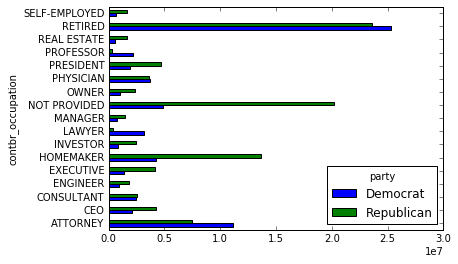

In [36]:
# 画图
over_2mm.plot(kind='barh')

In [42]:
# 对Obama和Romney总出资额最高的职业和企业
def get_top_amounts(group,key,n=5):
    totals = group.groupby(key)['contb_receipt_amt'].sum()
    return totals.sort_values(ascending=False)[:n]

# 根据职业和雇主进行聚合
grouped = fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts,'contbr_occupation',n=7)

cand_nm        contbr_occupation
Obama, Barack  RETIRED              25305116.38
               ATTORNEY             11141982.97
               NOT PROVIDED          4866973.96
               HOMEMAKER             4248875.80
               PHYSICIAN             3735124.94
               LAWYER                3160478.87
               CONSULTANT            2459912.71
Romney, Mitt   RETIRED              11508473.59
               NOT PROVIDED         11396894.84
               HOMEMAKER             8147446.22
               ATTORNEY              5364718.82
               PRESIDENT             2491244.89
               CEO                   2326797.03
               EXECUTIVE             2300947.03
Name: contb_receipt_amt, dtype: float64

In [43]:
grouped.apply(get_top_amounts,'contbr_employer',n=10)

cand_nm        contbr_employer   
Obama, Barack  RETIRED               22694358.85
               SELF-EMPLOYED         18626807.16
               NOT EMPLOYED           8586308.70
               NOT PROVIDED           5053480.37
               HOMEMAKER              2605408.54
               STUDENT                 318831.45
               VOLUNTEER               257104.00
               MICROSOFT               215585.36
               SIDLEY AUSTIN LLP       168254.00
               REFUSED                 149516.07
Romney, Mitt   NOT PROVIDED          12059527.24
               RETIRED               11506225.71
               HOMEMAKER              8147196.22
               SELF-EMPLOYED          7414115.22
               STUDENT                 496490.94
               CREDIT SUISSE           281150.00
               MORGAN STANLEY          267266.00
               GOLDMAN SACH & CO.      238250.00
               BARCLAYS CAPITAL        162750.00
               H.I.G. CAPITAL      

### 对出资额分组

In [44]:
# 利用cut函数根据出资额的大小将数据离散化到多个面元
bins = np.array([0,1,10,100,1000,10000,100000,1000000,10000000])
labels = pd.cut(fec_mrbo.contb_receipt_amt,bins)
labels

411           (10, 100]
412         (100, 1000]
413         (100, 1000]
414           (10, 100]
415           (10, 100]
416           (10, 100]
417         (100, 1000]
418           (10, 100]
419         (100, 1000]
420           (10, 100]
421           (10, 100]
422         (100, 1000]
423         (100, 1000]
424         (100, 1000]
425         (100, 1000]
426         (100, 1000]
427       (1000, 10000]
428         (100, 1000]
429         (100, 1000]
430           (10, 100]
431       (1000, 10000]
432         (100, 1000]
433         (100, 1000]
434         (100, 1000]
435         (100, 1000]
436         (100, 1000]
437           (10, 100]
438         (100, 1000]
439         (100, 1000]
440           (10, 100]
              ...      
701356        (10, 100]
701357          (1, 10]
701358        (10, 100]
701359        (10, 100]
701360        (10, 100]
701361        (10, 100]
701362      (100, 1000]
701363        (10, 100]
701364        (10, 100]
701365        (10, 100]
701366        (1

In [49]:
# 根据候选人姓名以及面元标签对数据进行分组
grouped = fec_mrbo.groupby(['cand_nm',labels])
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493.0,77.0
"(1, 10]",40070.0,3681.0
"(10, 100]",372280.0,31853.0
"(100, 1000]",153991.0,43357.0
"(1000, 10000]",22284.0,26186.0
"(10000, 100000]",2.0,1.0
"(100000, 1000000]",3.0,NaN
"(1000000, 10000000]",4.0,NaN


In [50]:
# 对出资额求和并在面元内规格化
bucket_sums = grouped.contb_receipt_amt.sum().unstack(0)
bucket_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",318.24,77.00
"(1, 10]",337267.62,29819.66
"(10, 100]",20288981.41,1987783.76
"(100, 1000]",54798531.46,22363381.69
"(1000, 10000]",51753705.67,63942145.42
"(10000, 100000]",59100.00,12700.00
"(100000, 1000000]",1490683.08,NaN
"(1000000, 10000000]",7148839.76,NaN


In [52]:
normed_sums = bucket_sums.div(bucket_sums.sum(axis=1),axis=0)
normed_sums

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",0.805182,0.194818
"(1, 10]",0.918767,0.081233
"(10, 100]",0.910769,0.089231
"(100, 1000]",0.710176,0.289824
"(1000, 10000]",0.447326,0.552674
"(10000, 100000]",0.823120,0.176880
"(100000, 1000000]",1.000000,NaN
"(1000000, 10000000]",1.000000,NaN


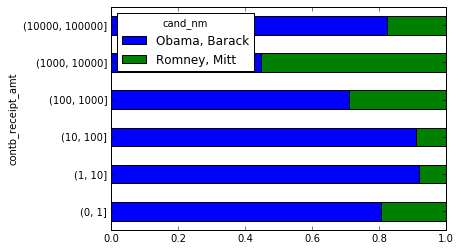

In [53]:
# 排除最大的两个面元,因为不是由个人捐赠的
normed_sums[:-2].plot(kind='barh',stacked=True)

### 根据州统计赞助信息